In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [21]:
glass = pd.read_excel("glass.xlsx", sheet_name="glass")
display(glass.head())

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [22]:
print("\nMissing values per column:")
print(glass.isnull().sum())


Missing values per column:
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [23]:
print("\nDescriptive statistics:")
display(glass.describe().T)


Descriptive statistics:


,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


C:\Users\yasha\AppData\Local\Temp\ipykernel_12708\557259194.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Type", data=glass, palette="Set1")  # Changed color palette


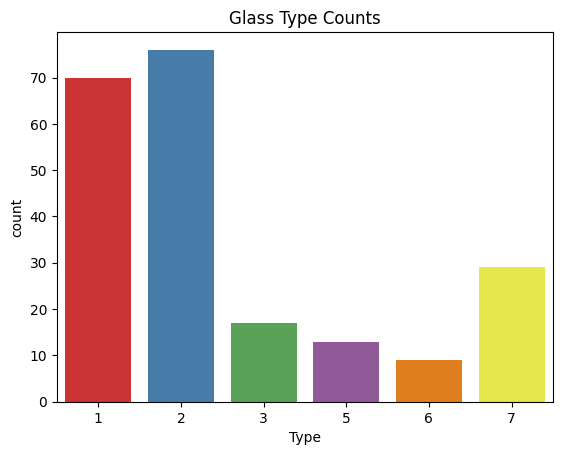

In [24]:
sns.countplot(x="Type", data=glass, palette="Set1")  # Changed color palette
plt.title("Glass Type Counts")
plt.show()


In [26]:
#target columns to numeric columns
num_cols = glass.columns.drop("Type")
num_cols

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

In [27]:
n_cols = 3
n_rows = (len(num_cols) // n_cols) + (1 if len(num_cols) % n_cols != 0 else 0) 

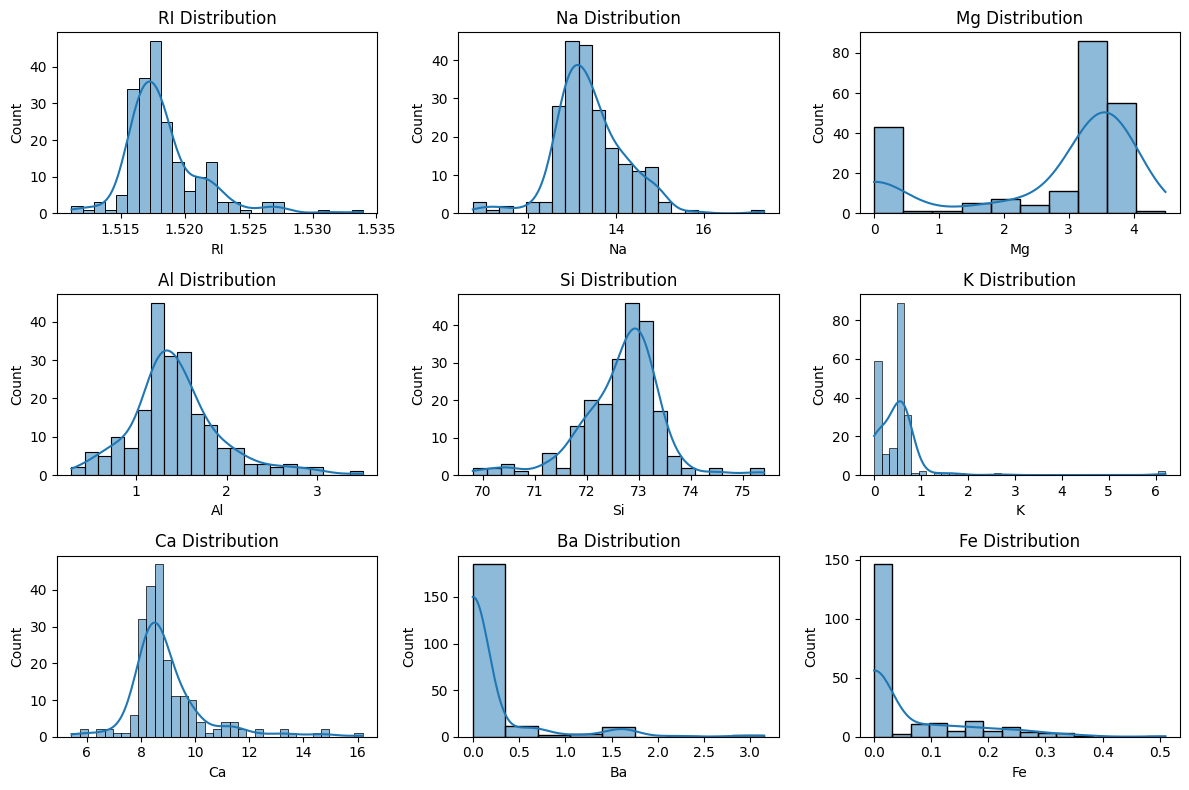

In [29]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(glass[col], kde=True)  
    plt.title(f"{col} Distribution")
plt.tight_layout()
plt.show()


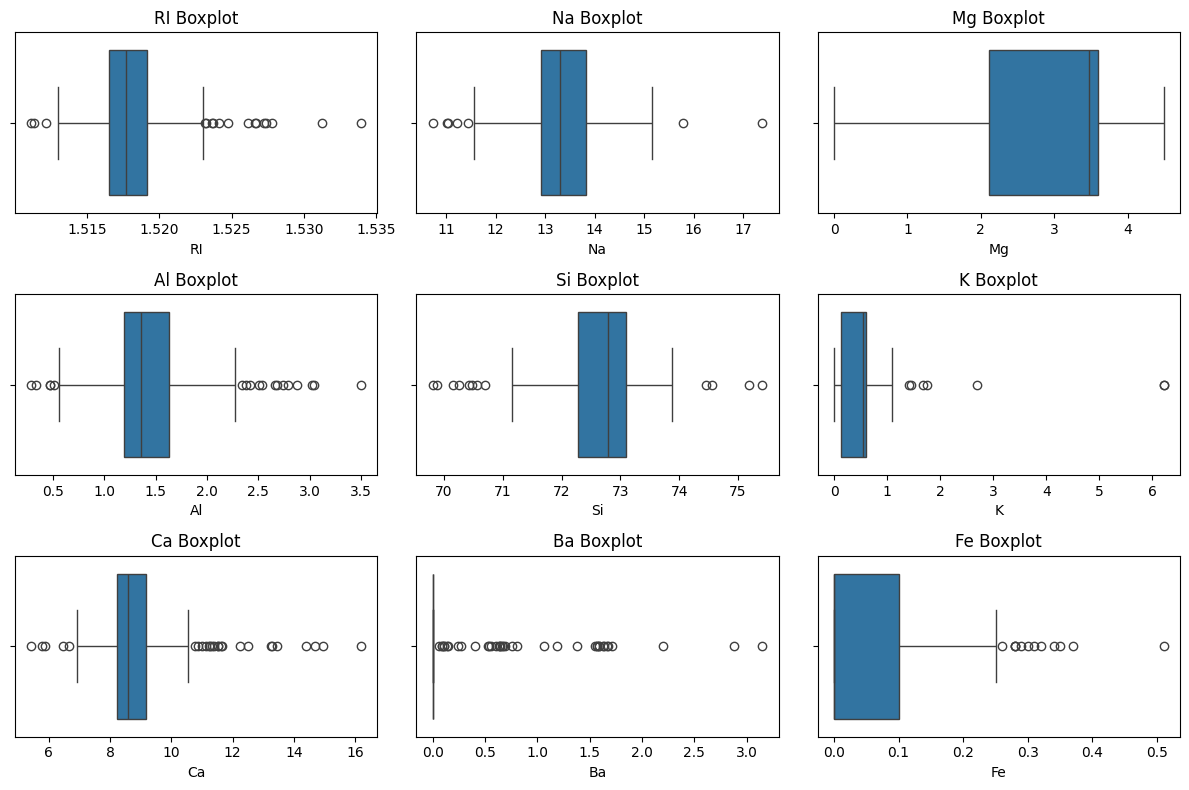

In [30]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=glass[col])  
    plt.title(f"{col} Boxplot")
plt.tight_layout()
plt.show()

In [31]:
#encoding target values
le = LabelEncoder()
glass["Type"] = le.fit_transform(glass["Type"])

In [32]:
scaler = StandardScaler()
X = glass.drop("Type", axis=1)
y = glass["Type"]
X_scaled = scaler.fit_transform(X)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [35]:
#random forest
rf = RandomForestClassifier(n_estimators=90, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Classifier - Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier - Performance
Accuracy: 0.7846153846153846
              precision    recall  f1-score   support

           0       0.75      0.95      0.84        19
           1       0.80      0.70      0.74        23
           2       0.67      0.50      0.57         4
           3       0.60      0.50      0.55         6
           4       0.75      1.00      0.86         3
           5       1.00      0.90      0.95        10

    accuracy                           0.78        65
   macro avg       0.76      0.76      0.75        65
weighted avg       0.79      0.78      0.78        65



In [37]:
#bagging
bag = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=90,
    random_state=42
)
bag.fit(X_train, y_train)
y_pred_bag = bag.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_bag))
print(classification_report(y_test, y_pred_bag))


Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.74      0.89      0.81        19
           1       0.80      0.70      0.74        23
           2       0.67      0.50      0.57         4
           3       1.00      0.67      0.80         6
           4       0.75      1.00      0.86         3
           5       0.91      1.00      0.95        10

    accuracy                           0.80        65
   macro avg       0.81      0.79      0.79        65
weighted avg       0.81      0.80      0.80        65



In [39]:
#Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=90, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.72      0.95      0.82        19
           1       0.76      0.70      0.73        23
           2       1.00      0.75      0.86         4
           3       1.00      0.33      0.50         6
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00        10

    accuracy                           0.80        65
   macro avg       0.87      0.79      0.79        65
weighted avg       0.82      0.80      0.79        65



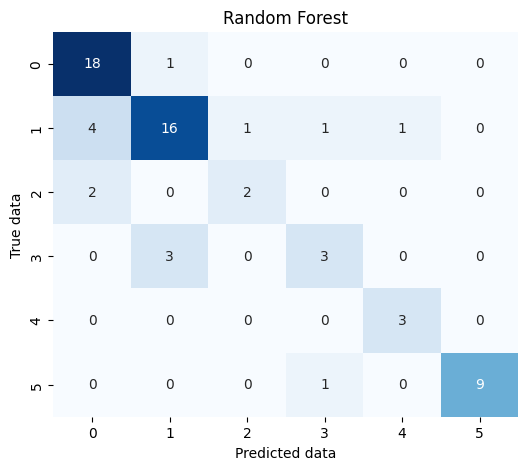

In [55]:
#confusion matrix for random forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Random Forest")
plt.ylabel("True data")
plt.xlabel("Predicted data")
plt.show()


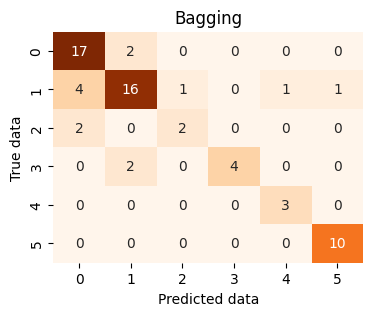

In [54]:
# Confusion Matrix for Bagging
conf_matrix_bag = confusion_matrix(y_test, y_pred_bag)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_bag, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.title("Bagging")
plt.ylabel("True data")
plt.xlabel("Predicted data")
plt.show()

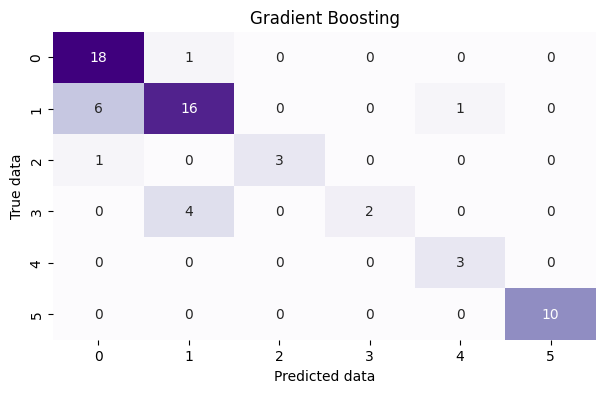

In [53]:
# Confusion Matrix for Gradient Boosting
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(7, 4))
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Purples", cbar=False)
plt.title("Gradient Boosting")
plt.ylabel("True data")
plt.xlabel("Predicted data")
plt.show()

In [ ]:
#1. Explain Bagging and Boosting methods. How is it different from each other.
->ensemble technique that trains multiple models
->educe variance and avoid overfitting.

->ensemble technique that trains models sequentially
->Reduce bias and improve model accuracy.

In [ ]:
#Explain how to handle imbalance in the data.
->Handling imbalanced data is crucial when working with classification problems where one class.
->Resampling
->Class Weight adjustment